<a href="https://colab.research.google.com/github/JamesLeeeeeee/machineLearning_practice/blob/master/20211018_%EC%9D%B4%EC%9E%AC%EA%B4%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
train_input, test_input, train_target, test_target= train_test_split(perch_length, perch_weight, random_state=42)

In [4]:
train_input = train_input.reshape(-1,1)
test_input=test_input.reshape(-1,1)

In [5]:
from sklearn.neighbors import KNeighborsRegressor

In [6]:
knr= KNeighborsRegressor(n_neighbors= 3)
knr.fit(train_input, train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [7]:
knr.score(test_input, test_target)

0.974645996398761

In [8]:
knr.predict([[50]])

array([1033.33333333])

In [9]:
import matplotlib.pyplot as plt

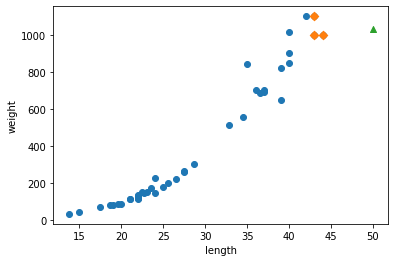

In [10]:
distances, indexes = knr.kneighbors([[50]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes],train_target[indexes], marker='D')

plt.scatter(50,1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [11]:
print(np.mean(train_target[indexes]))

1033.3333333333333


In [12]:
print(knr.predict([[100]]))

[1033.33333333]


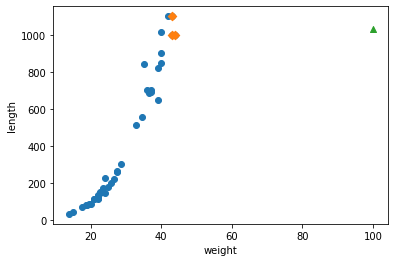

In [13]:
distances, indexes = knr.kneighbors([[100]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(100,1033, marker='^')
plt.xlabel('weight')
plt.ylabel('length')
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [16]:
lr.fit(train_input, train_target)
print(lr.predict([[100]]))

[3192.69585141]


In [17]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


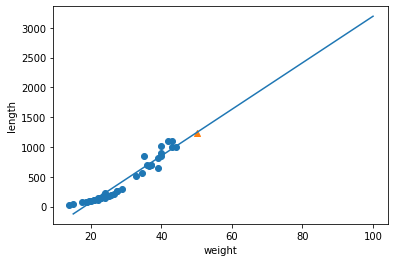

In [19]:
plt.scatter(train_input, train_target)
plt.scatter(50, 1241.8 , marker='^')
plt.plot([15,100],[15*lr.coef_+lr.intercept_, 100*lr.coef_+ lr.intercept_])
plt.xlabel('weight')
plt.ylabel('length')
plt.show()

In [20]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9398463339976039
0.8247503123313558


In [22]:
train_poly= np.column_stack((train_input**2, train_input))
test_poly= np.column_stack((test_input**2, test_input))
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [25]:
lr= LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50**2,50]]))

[1573.98423528]


In [26]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278276


In [27]:
# 무게 = a * 길이**2 + b *길이 + c

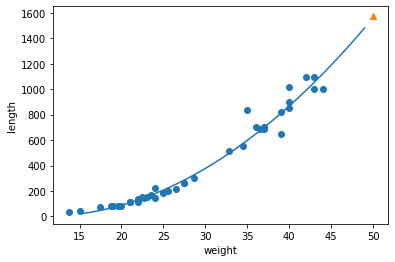

In [29]:
point= np.arange(15,50)
plt.scatter(train_input, train_target)
plt.plot(point,1.01*point**2 - 21.6*point + 116.05)
plt.scatter(50, 1574 , marker='^')
plt.xlabel('weight')
plt.ylabel('length')
plt.show()

In [30]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


In [31]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
print(df)

    length   height   width
0      8.4     2.11    1.41
1     13.7     3.53    2.00
2     15.0     3.82    2.43
3     16.2     4.59    2.63
4     17.4     4.59    2.94
5     18.0     5.22    3.32
6     18.7     5.20    3.12
7     19.0     5.64    3.05
8     19.6     5.14    3.04
9     20.0     5.08    2.77
10    21.0     5.69    3.56
11    21.0     5.92    3.31
12    21.0     5.69    3.67
13    21.3     6.38    3.53
14    22.0     6.11    3.41
15    22.0     5.64    3.52
16    22.0     6.11    3.52
17    22.0     5.88    3.52
18    22.0     5.52    4.00
19    22.5     5.86    3.62
20    22.5     6.79    3.62
21    22.7     5.95    3.63
22    23.0     5.22    3.63
23    23.5     6.28    3.72
24    24.0     7.29    3.72
25    24.0     6.38    3.82
26    24.6     6.73    4.17
27    25.0     6.44    3.68
28    25.6     6.56    4.24
29    26.5     7.17    4.14
30    27.3     8.32    5.14
31    27.5     7.17    4.34
32    27.5     7.05    4.34
33    27.5     7.28    4.57
34    28.0     7.82 

In [33]:
perch_full= df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [34]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [35]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target= train_test_split(perch_full, perch_weight, random_state=42)

In [36]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
poly= PolynomialFeatures()
print(poly)
print(type(poly))

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')
<class 'sklearn.preprocessing._data.PolynomialFeatures'>


In [42]:
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


In [44]:
print(poly.fit_transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


In [45]:
poly= PolynomialFeatures(include_bias=False)
print(poly.fit_transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [50]:
poly= PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [51]:
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [52]:
test_poly= poly.transform(test_input)

In [53]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982124
0.9714559911594132


In [56]:
poly= PolynomialFeatures(degree= 5, include_bias= False)
train_poly=poly.fit_transform(train_input)
test_poly=poly.transform(test_input)
print(train_poly.shape, test_poly.shape)

(42, 55) (14, 55)


In [57]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9999999999991096
-144.40579242335605


In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
ss= StandardScaler()
train_scaled= ss.fit_transform(train_poly)
test_scaled= ss.transform(test_poly)

In [60]:
from sklearn.linear_model import Ridge
ridge= Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615398


In [61]:
import matplotlib.pyplot as plt
train_score=[]
test_score=[]

In [62]:
alpha_list=[0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
  ridge= Ridge(alpha=alpha)
  ridge.fit(train_scaled, train_target)

  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

print(train_score)
print(test_score)

[0.9930455252088191, 0.9917809981250537, 0.9903815817570366, 0.9896101671037343, 0.988728468997471, 0.9841843235774494]
[0.9569388961556662, 0.980018793687313, 0.9827976465386927, 0.9790693977615398, 0.9725329582461568, 0.9627042641050291]


In [64]:
for i in range(5):
  print(train_score[i]-test_score[i])

0.03610662905315287
0.011762204437740675
0.007583935218343885
0.0105407693421945
0.0161955107513142


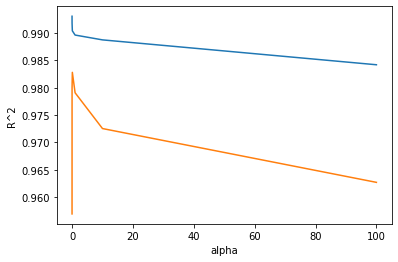

In [66]:
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

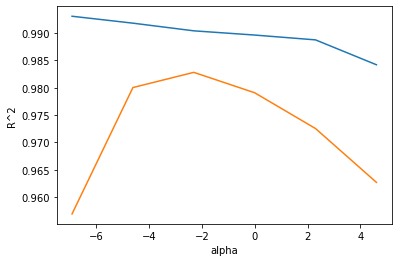

In [67]:
plt.plot(np.log(alpha_list), train_score)
plt.plot(np.log(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

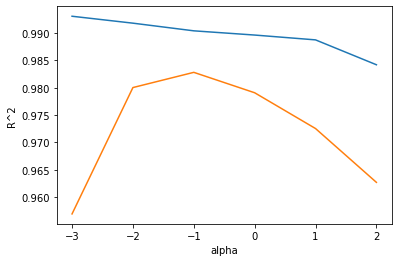

In [68]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [69]:
ridge= Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386927


In [70]:
from sklearn.linear_model import Lasso 
lasso= Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9897898972080961
0.9800593698421883


In [72]:
test_score=[]
train_score=[]
alphas=[0.001, 0.01 , 0.1 , 1 , 10, 100]
for alpha in alphas:
  lasso=Lasso(alpha=alpha, max_iter= 10000)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))
print(train_score)
print(test_score)

[0.9924957354689654, 0.9922988130765112, 0.9902080238600285, 0.9898116789062786, 0.9887624603020235, 0.9078618674946646]
[0.9731817502723494, 0.9761545611184548, 0.9824382983968606, 0.9801844137326112, 0.9830309645308443, 0.9090772073024512]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792876, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345404844, tolerance: 518.2793833333334
  positive)


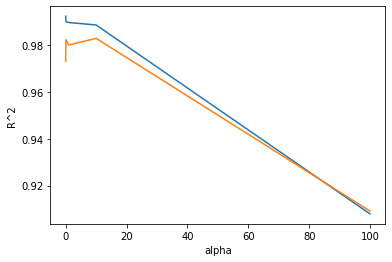

In [73]:
plt.plot(alphas, train_score)
plt.plot(alphas, test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

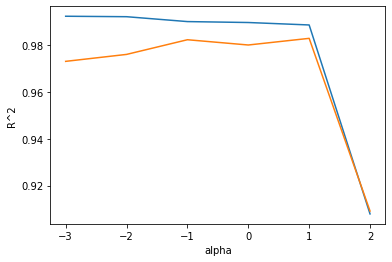

In [74]:
plt.plot(np.log10(alphas), train_score)
plt.plot(np.log10(alphas), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [76]:
lasso= Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [77]:
print(np.sum(lasso.coef_==0))

40
